<a href="https://colab.research.google.com/github/zain910128/MS-Gamer_Segmentation/blob/master/Gamer_Survey_Analysis_and_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open in Colab to view all interactive plots.

# Intro


## Background:
In 2008, Pew Research Center conducted the first comprehensive study  on Video Gaming in the American landscape. The study was very broad in its scope and collected data on all facets of gaming and its influence on teenagers. 

The 2008 period is a good starting point for any research on video games because the trends in video games can be studied over a long period now that we are in 2020.

This project does not study the change is trend, but only provides a thorough analysis of gamers in 2008. This analysis can be used in the future for any comparative studies based on more recent data.

## Project objectives
This project will aim to answer the following questions:
1.	Is there any pattern in the choice of games played by teenagers?
2.	Does the choice of one category of games imply the choice for another category of games?
3.	Can we form clusters of gamer types with distinct traits?


## Benefits
If we are able to form distinct clusters and identify common traits, this information can be valuable for various things such as to:
1.	Improve targeting of marketing campaigns
2.	Create more games for clusters having larger number of gamers
3.	Track the change in distribution of gamers across the clusters over time and adapt business strategies accordingly




# A. Importing Data into a Pandas DataFrame

In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv('https://gist.githubusercontent.com/zain910128/77f64ee0d292fd103d0bddd6fe1264bd/raw/843ad14d236f3fd4568bed5f01f942e06789c975/Teens_Gaming_2008_csv.csv')

In [3]:
print(" See number of columns and rows imported")

raw.shape

 See number of columns and rows imported


(1102, 166)

In [4]:
print(" See datatype of columns")

raw.dtypes

 See datatype of columns


psraid        int64
weight      float64
int_date      int64
tz           object
cregion       int64
             ...   
k3dos        object
k12os        object
k13os        object
k17game      object
k28game      object
Length: 166, dtype: object

In [5]:
print("Preview first 2 rows of the data")
raw.head(2)

Preview first 2 rows of the data


,psraid,weight,int_date,tz,cregion,fips,state,msa,usr,usr1,cstatus,p1,p2,kidage,kidgen,p4a,p5a,kidsel,p4b,p5b,p6,p7,q1a,q1b,q2a,q2b,q3a,q3b,q3c,q3d,q4,q5a,q5b,q5c,q5d,q7a,q7b,psex,age,educ,...,k29b,k29c,k29d,k29e,k29f,k29g,k29h,k30a,k30b,k31a,k31b,k32a,k20cnt,ksex,kage,racethn,kagerec,numkids,i_user,c_user,c_age,c_agegrp,c_sex,c_game,k3cnt,k4cnt,k6cnt,k7cnt,k8cnt,k9cnt,k14cnt,k26cnt,k29cnt,raceos,modemos,k3dos,k12os,k13os,k17game,k28game
0,634,4.000000,110707,E,1,34017,34,35620,S,2,2,2,1,16,1,16,1,,,,1,1,1,1,1,1,1,3,3,1,1,1,2,1,2,3,,1,35,3,...,4,2,4,4,2,2,3,3,,3,,3,0,1,16,4,5,1,1,1,16,2,1,1,2,3,3,5,2,3,5,4,0,,,WORK,,,"MADDEN, NBA LIVE, NASCAR",
1,16854,1.333333,12408,E,1,34003,34,35620,S,2,1,1,1,13,2,13,2,,,,1,1,1,1,1,1,2,2,2,1,1,2,3,2,2,3,,2,56,5,...,3,2,3,2,3,3,8,3,,3,,8,2,2,13,3,2,1,1,1,13,1,2,1,4,3,5,5,3,3,5,3,1,,,A CELL PHONE,,,"THE SIMS 2, CRAZY TAXI 4, SIM PETS","WORD SEARCH, BRAIN TEASERS, POLITICAL GAMES"


In [6]:
df = raw.copy()

# B.	Statistical Description

Let's study the statistical description of respondent education (educ) and household income (income) of the dataset at large, as well as in terms of number of teenagers in the household (p2)

a.	Income bins: (1) < 10k, (2) 10k - 20k, (3) 20k-30k, (4) 30k-40k, (5) 40k-50k, (6) 50k-75k, (7) 75k-100k, (8) 100k+, (9) Don’t know / refused

b.	Education bins: (1) none/grades 1-8, (2) some high school, (3) high school graduate (4) vocational education post-high school (5) some college (6) college degree (7) some post graduate education or more, (9) Don’t know / refused


## Overall statistics

In [7]:
print("Preview first 5 rows of columns educ , income , p2")
df[['educ','income','p2']].head()

Preview first 5 rows of columns educ , income , p2


,educ,income,p2
0,3,4,1
1,5,5,1
2,7,8,2
3,6,8,1
4,7,6,1


In [8]:
print("Check data type of the columns")
df[['educ','income','p2']].dtypes

Check data type of the columns


educ      int64
income    int64
p2        int64
dtype: object

### Summary statistics

In [9]:
df[['educ','income','p2']].describe()

,educ,income,p2
count,1102.000000,1102.000000,1102.000000
mean,4.810345,6.032668,1.420145
std,1.589978,2.175085,0.678242
min,1.000000,1.000000,1.000000
25%,3.000000,5.000000,1.000000
50%,5.000000,6.000000,1.000000
75%,6.000000,8.000000,2.000000
max,9.000000,9.000000,4.000000


### Distribution of Education level

In [19]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

fig = px.histogram(df, x="educ",labels = {'educ':'Education level (x)'}, color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()

### Distribution of Income level

In [11]:
fig = px.histogram(df, x="income",labels = {'income':'Income level'}, color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()

### Distribution of Number of Teenagers in the house

In [12]:
fig = px.histogram(df, x="p2",range_x=[0,6],labels = {'p2':'# of Teens (p2)'}, color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()

We can see from the above 3 histograms, that the distributions are not Gaussian.

### Skew in distribution of educ , income , p2

In [13]:
df[['educ','income','p2']].skew()

educ     -0.358090
income   -0.593198
p2        1.752453
dtype: float64

## Statistics by number of teenagers (p2)

Now we look at the data in terms in "p2" :

### Correlation of p2 with educ and income

In [14]:
df[['educ','income','p2']].corr()

,educ,income,p2
educ,1.000000,0.399153,-0.033849
income,0.399153,1.000000,-0.000693
p2,-0.033849,-0.000693,1.000000


"p2" does not seem to be correlated with educ and income

### Skew in educ and income for different p2

In [15]:
df[['educ','income','p2']].groupby('p2').skew()

,educ,income
p2,,
1,-0.341663,-0.529077
2,-0.406697,-0.773531
3,-0.367284,-0.728613
4,-0.189371,-0.119209


The magnitude of skew seems to be lower for p2=4

### Mode of "educ" and "income" by p2

In [16]:
df[['educ','income','p2']].groupby('p2').agg(lambda x:x.value_counts().index[0])

,educ,income
p2,,
1,5,8
2,5,8
3,6,7
4,5,8


If we look at the Mode statistic, households with p=1,2,4 have the same value for educ and income.

Interestingly, Only p=3 is different, with more education, but less income.

### Summary statistics of "income" for different p2

In [17]:
df[['income','p2']].groupby('p2').describe()

income                                             
    count      mean       std  min  25%  50%  75%  max
p2                                                    
1   734.0  5.993188  2.158446  1.0  4.0  6.0  8.0  9.0
2   297.0  6.178451  2.144715  1.0  5.0  7.0  8.0  9.0
3    47.0  6.063830  2.180988  1.0  5.0  6.0  7.5  9.0
4    24.0  5.375000  2.916408  1.0  3.0  6.0  8.0  9.0

### Heatmap  of "income" vs "p2"

In [18]:
df[['income','p2']].pivot_table(index='p2', columns='income', 
                        aggfunc='size', fill_value=0).style.background_gradient(cmap='Wistia',axis=None).set_table_attributes('style="font-size: 17px"')

income,1,2,3,4,5,6,7,8,9
p2,,,,,,,,,
1,20,42,56,70,67,140,118,143,78
2,13,8,22,22,25,55,47,77,28
3,2,3,1,5,3,10,11,6,6
4,2,3,5,1,0,2,2,5,4


### Summary statistics of "educ" for different p2

In [19]:
df[['educ','p2']].groupby('p2').describe()

educ                                             
    count      mean       std  min  25%  50%  75%  max
p2                                                    
1   734.0  4.813351  1.566807  1.0  3.0  5.0  6.0  9.0
2   297.0  4.885522  1.617167  1.0  3.0  5.0  6.0  9.0
3    47.0  4.574468  1.703509  1.0  3.0  5.0  6.0  7.0
4    24.0  4.250000  1.674619  1.0  3.0  5.0  5.0  7.0

### Heatmap of "educ" vs "p2"

In [20]:
df[['educ','p2']].pivot_table(index='p2', columns='educ', 
                        aggfunc='size', fill_value=0).style.background_gradient(cmap='Wistia',axis=None).set_table_attributes('style="font-size: 17px"')

educ,1,2,3,4,5,6,7,9
p2,,,,,,,,
1,13,31,171,41,192,185,99,2
2,7,13,64,11,79,78,43,2
3,2,3,12,2,10,13,5,0
4,1,3,6,0,9,3,2,0


## Kruskal Wallis Test
Let's do a couple of tests to see if there is a significant (alpha=5%)  change in distribution for different values of p2.

Since the distribution is quite skewed. We prefer a non parametric Rank test over ANOVA.

### Test 1

Our Null Hypothesis is that p2 does not affect educ


In [21]:
from scipy.stats import mstats

Col_1 = df[['educ','p2']].groupby('p2').get_group(1)['educ'].values
Col_2 = df[['educ','p2']].groupby('p2').get_group(2)['educ'].values
Col_3 = df[['educ','p2']].groupby('p2').get_group(3)['educ'].values
Col_4 = df[['educ','p2']].groupby('p2').get_group(4)['educ'].values

print("Kruskal Wallis H-test :\n")

H, pval = mstats.kruskalwallis(Col_1, Col_2, Col_3, Col_4)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test :

H-statistic: 4.474066202757363
P-Value: 0.2146152206223997
Accept NULL hypothesis - No significant difference between groups.



### Test 2

Our Null Hypothesis is that p2 does not affect income

In [22]:
from scipy.stats import mstats

Col_1 = df[['income','p2']].groupby('p2').get_group(1)['income'].values
Col_2 = df[['income','p2']].groupby('p2').get_group(2)['income'].values
Col_3 = df[['income','p2']].groupby('p2').get_group(3)['income'].values
Col_4 = df[['income','p2']].groupby('p2').get_group(4)['income'].values

print("Kruskal Wallis H-test :\n")

H, pval = mstats.kruskalwallis(Col_1, Col_2, Col_3, Col_4)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test :

H-statistic: 2.6595585247559486
P-Value: 0.44714370451442553
Accept NULL hypothesis - No significant difference between groups.


### Hypotheses conclusion

From the above 2 tests, we conclude that P2 does not affect "educ" and "income"

# C. Clustering and labelling

Columns k14{a..l} describe teenagers participation in various genres of games:


a: fighting games, b: puzzle games, c: action games, d: FPS games, e: strategy games, f: simulation games, g: sports games, h: RPG games, i: adventure games, j: racing games, k: rhythm games & l: survival horror games (1 for YES, 2 for NO)


Using these columns, let us try to create a clustering or labelling scheme for these respondents.

## Step 1 - Get relevant subset of data

In [23]:
k14 = ["k14a","k14b","k14c","k14d","k14e","k14f","k14g","k14h","k14i","k14j","k14k","k14l"]

x = df[["psraid"]+k14+["K17_CD1","K17_CD2","K17_CD3","k17game"]]

In [24]:
k14_names = ["fighting","puzzle", "action","FPS","strategy","simulation","sports","RPG","adventure","racing","rhythm","survival"]

k14_dict = dict(zip(k14, k14_names))

In [25]:
x.rename(columns=k14_dict , inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
x.head()

,psraid,fighting,puzzle,action,FPS,strategy,simulation,sports,RPG,adventure,racing,rhythm,survival,K17_CD1,K17_CD2,K17_CD3,k17game
0,634,1,1,2,2,2,2,1,2,1,1,2,2,24,35,33,"MADDEN, NBA LIVE, NASCAR"
1,16854,8,1,2,2,2,1,2,2,1,1,1,2,57,0,57,"THE SIMS 2, CRAZY TAXI 4, SIM PETS"
2,14856,2,2,1,1,1,1,2,2,2,2,1,2,5,18,55,"CALL OF DUTY 4, GUITAR HERO 3, ORANGE BOX"
3,14752,1,1,1,1,2,1,1,2,1,1,1,1,20,18,48,"HALO 3, GUITAR HERO, MARIO GALAXY"
4,115,1,1,1,1,1,2,1,2,2,1,1,2,20,18,0,"HALO 3, GUITER HERO, BLOON'S POWER DEFENSE 2"


## Step 2 - Pre-Processing

We have invalid entries in columns k14a to k14l

"8" is not a valid option. As per the survey instructions, only 1 / 2 / 9 are valid options. So we convert all 8 to 9

In [27]:
print("See the values in the columns")

list(map(set,x[k14_names].values.T))

See the values in the columns


[{' ', '1', '2', '8'},
 {' ', '1', '2'},
 {' ', '1', '2', '8'},
 {' ', '1', '2', '8'},
 {' ', '1', '2', '8'},
 {' ', '1', '2', '8', '9'},
 {' ', '1', '2'},
 {' ', '1', '2', '8'},
 {' ', '1', '2', '8', '9'},
 {' ', '1', '2'},
 {' ', '1', '2'},
 {' ', '1', '2', '9'}]

In [28]:
x[k14_names] = x[k14_names].replace([' ','8'],'9')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
print("The values in the columns should be only 1 / 2 / 9")
list(map(set,x[k14_names].values.T))

The values in the columns should be only 1 / 2 / 9


[{'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'},
 {'1', '2', '9'}]

## Step 3 - Data Exploration

The Data type of the k14 columns is object, whereas the survey responses are number coded. But we leave that as it is since our data is categorical.

In [30]:
x.dtypes

psraid         int64
fighting      object
puzzle        object
action        object
FPS           object
strategy      object
simulation    object
sports        object
RPG           object
adventure     object
racing        object
rhythm        object
survival      object
K17_CD1       object
K17_CD2       object
K17_CD3       object
k17game       object
dtype: object

Let's see how many people have responded:
 - 1 = Yes
 - 2 = No
 - 9 = Don't know / refused

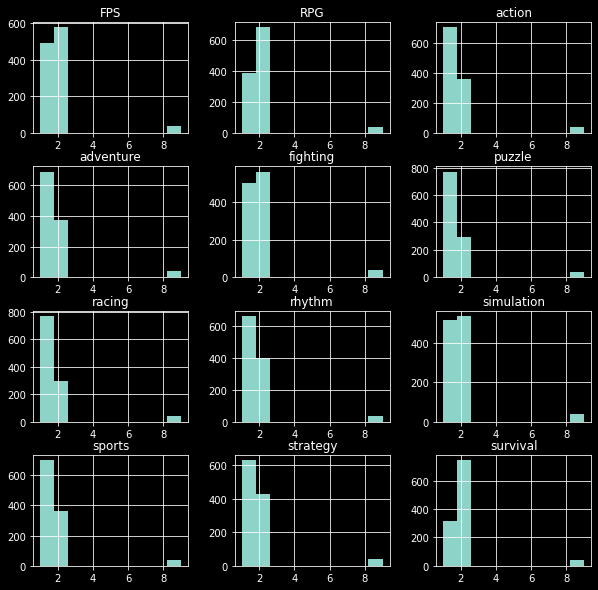

In [31]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

x[k14_names].astype('int32').hist(figsize = (10,10) );

Let's now use Dummy encoding for the variables

In [32]:
x_enc = pd.get_dummies(x[k14_names])
x_enc

,fighting_1,fighting_2,fighting_9,puzzle_1,puzzle_2,puzzle_9,action_1,action_2,action_9,FPS_1,FPS_2,FPS_9,strategy_1,strategy_2,strategy_9,simulation_1,simulation_2,simulation_9,sports_1,sports_2,sports_9,RPG_1,RPG_2,RPG_9,adventure_1,adventure_2,adventure_9,racing_1,racing_2,racing_9,rhythm_1,rhythm_2,rhythm_9,survival_1,survival_2,survival_9
0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1098,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1099,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
1100,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


Let's use a heatmap to try to get a quick visual overview of correlation between responses.

In [33]:
x_enc.corr().style.background_gradient(cmap='viridis',axis=None).format("{:.2}").set_table_attributes('style="font-size: 10px"')

The following inferences can be made:
- Every 3rd column is highly correlated with a yellow highlight.
- Turns out that every 3rd column is the response of "Don't know or refused"
- This means that who don't know or refuse to answer about a certain Game Genre, are likely to not know or refuse for other genres as well
- Such people are probably those who are not at all into gaming

- We also see some structure in the other colours in the heatmap, but not well enough to make any inferences
- We must study it quantitatively to proceed

## Step 4 - Clusterting

### Hierarchial clustering

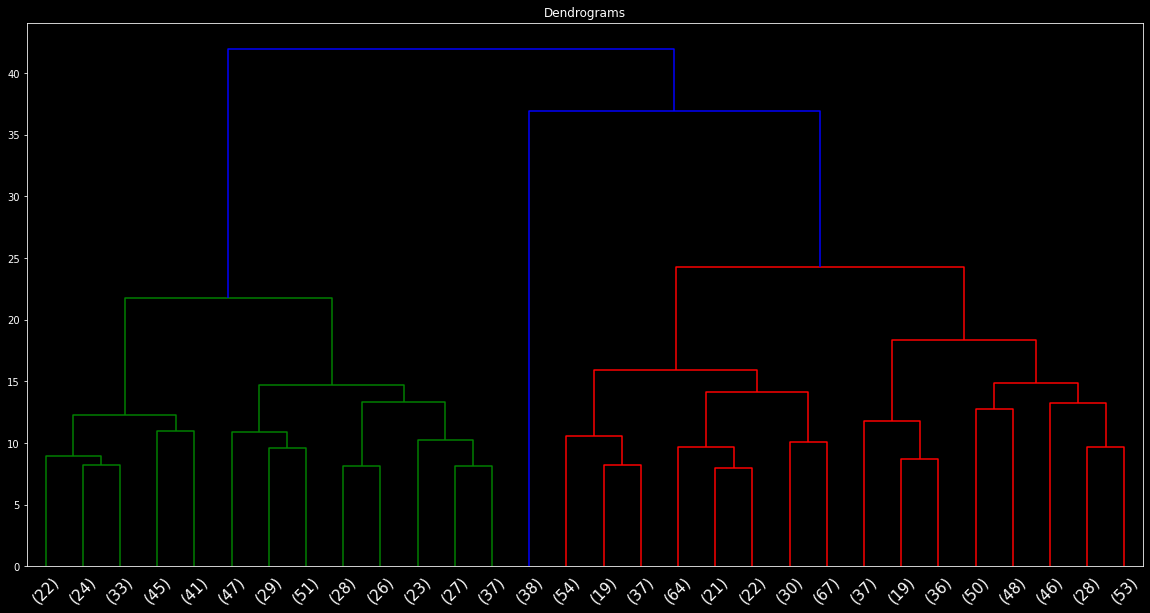

In [34]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_enc, method='ward'), p=30, truncate_mode="lastp",leaf_font_size = 15)

From the dendrogram we see:
- There are 3 broad groups denoted by the blue branches
- If we go down one more level, we can get 5 groups

Visually these 5 groups are well separated by the branch heights.


In [35]:
print( "Labels based on the cut")

from scipy.cluster.hierarchy import fcluster

y_hc = fcluster(shc.linkage(x_enc, method='ward'), t=20, criterion='distance')

y_hc

Labels based on the cut


array([1, 2, 5, ..., 4, 2, 1], dtype=int32)

### K-Modes Clustering

In [36]:
!pip install --upgrade kmodes
from kmodes.kmodes import KModes

In [37]:
cost = []
for num_clusters in list(range(1,20)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 30, verbose=0)
    kmode.fit_predict(x_enc)
    cost.append(kmode.cost_)
    #print(num_clusters)

#### Elbow plot

From the elbow plot below, we can see that K=5 seems to be a good choice for the number of clusters.

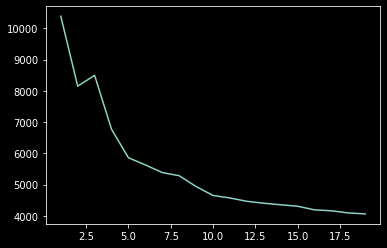

In [38]:
import numpy as np

y = np.array([i for i in range(1,20,1)])
plt.plot(y,cost);

Therefore, Let's get the labels using K-Modes when K=5

In [39]:
km = KModes(n_clusters=5, init='Cao', n_init=50, verbose=1)

from sklearn import metrics
print("Silhouette Score:")
print(metrics.silhouette_score(x_enc, y_hc, metric='sqeuclidean'))


clusters = km.fit_predict(x_enc)

# Get the cluster centroids

clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)
clusterCentroidsDf.columns = x_enc.columns
#clusterCentroidsDf


Initialization method and algorithm are deterministic. Setting n_init to 1.
Silhouette Score:
0.1663241528272866
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 232, cost: 6518.0
Run 1, iteration: 2/100, moves: 402, cost: 5858.0
Run 1, iteration: 3/100, moves: 27, cost: 5858.0


In [40]:
y_km = km.labels_
y_km

array([0, 0, 2, ..., 1, 3, 0], dtype=uint16)

## Step 5 - Comparison based on silhouettes

In [41]:
# Write function to quickly plot Silhouettes

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from matplotlib.colors import colorConverter


def silhouette_plot(X, y, n_clusters, ax=None):
    from sklearn.metrics import silhouette_samples, silhouette_score

    if ax is None:
        ax = plt.gca()

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(X, y)
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = padding = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color,
                         alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding

    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
    ax.annotate('Average',
                xytext=(silhouette_avg, y_lower * 1.025),
                xy=(0, 0),
                ha='center',
                alpha=0.8,
                c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax



Silhouette Plot of K-Modes for K=5

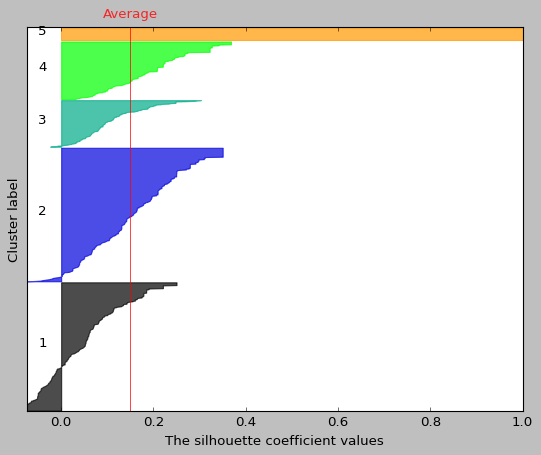

In [42]:
plt.style.use("classic")
silhouette_plot(x_enc, y_km, 5, ax=None);

Silhouette Plot of Hierarchial Clustering for K=5

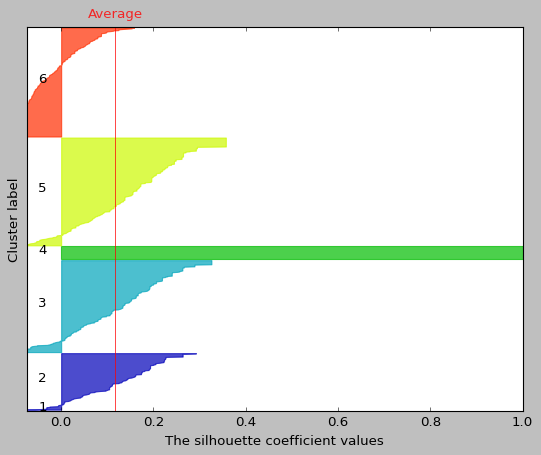

In [43]:
plt.style.use("classic")
silhouette_plot(x_enc, y_hc,6, ax=None);

From the 2 plots, we see that K-Modes has more even clusters.

## Step 6 - Dimensionality reduction with PCA 

We know that for each Genre, we have 3 columns (Yes / No / Don't know).

This means that if a person gives Yes as an answer, it can't be the other 2.

By taking this association into account, we can reduce dimensions using PCA.

In [44]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

pca_3d = PCA(n_components=3)
PCs_3d = pd.DataFrame(pca_3d.fit_transform(x_enc))
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


pca_2d = PCA(n_components=2)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(x_enc))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]



### Variation explained 
by first 3 principal components:

In [45]:
pca_3d.explained_variance_ratio_

array([0.22219391, 0.11201798, 0.1030851 ])

### Scree plot

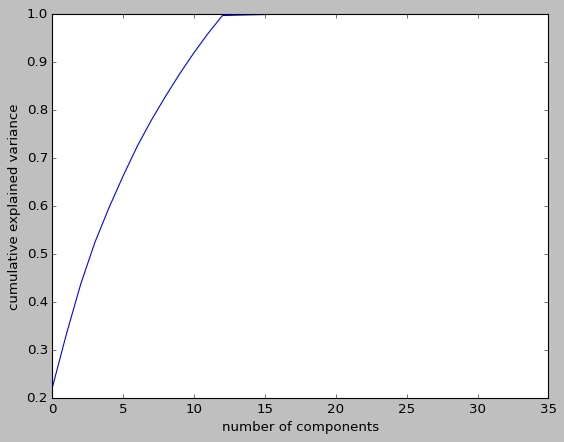

In [46]:


pca = PCA().fit(x_enc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



### Visualisations:

In [47]:
#Write function to quickly make PCA plots

def plot_pca(x,y):
  y = pd.DataFrame(y)
  y.columns = ["Cluster"]

  from sklearn.decomposition import PCA

  import plotly as py
  import plotly.graph_objs as go
  from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

  pca_3d = PCA(n_components=3)
  PCs_3d = pd.DataFrame(pca_3d.fit_transform(x))
  PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

  pca_2d = PCA(n_components=2)
  PCs_2d = pd.DataFrame(pca_2d.fit_transform(x))
  PCs_2d.columns = ["PC1_2d", "PC2_2d"]

  plotX = pd.concat([x,y,PCs_2d,PCs_3d], axis=1, join='inner')

  trace3d = {}
  trace2d = {}
  for i in set(y['Cluster']):
    cluster = plotX[plotX["Cluster"] == i]
    trace3d[i] = go.Scatter3d(
                    x = cluster["PC1_3d"],
                    y = cluster["PC2_3d"],
                    z = cluster["PC3_3d"],
                    mode = "markers",
                    name = "Cluster %s" %(i),
                    #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
    
    trace2d[i] = go.Scatter(
                    x = cluster["PC1_2d"],
                    y = cluster["PC2_2d"],
                    mode = "markers",
                    name = "Cluster %s" %(i),
                    #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
  ### 3D PCA
  data3d = [t for t in trace3d.values()]
  title = "Visualizing Clusters in Three Dimensions Using PCA"
  layout3d = dict(title = title,
                xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
              )
  fig = dict(data = data3d, layout = layout3d)
  iplot(fig)


  ### 2D PCA
  data2d = [t for t in trace2d.values()]
  title = "Visualizing Clusters in Two Dimensions Using PCA"
  layout2d = dict(title = title,
                xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
              )
  fig = dict(data = data2d, layout = layout2d)
  iplot(fig)


### K Modes
PCA Viz for K Modes with K=5

From the 3D PCA, we can see that there are disctinct clusters for the K Modes cluster labelling

In [48]:
plot_pca(x_enc,y_km)

### Heirarchial
PCA Viz for Heirarchial Clustering with K=5

Heirarchial clustering has a lot of overlap.

In [49]:
plot_pca(x_enc,y_hc)

### HDBSCAN Clustering


In [50]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 68kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2305919 sha256=a241264a2db7b2fb1bd3809cc55714d0cc5583eb6aa48a50dabaa5f6de2419b9
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [51]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10, cluster_selection_method='leaf')
clusterer.fit(x_enc)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='leaf', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=25, min_samples=10, p=None,
        prediction_data=False)

In [52]:
y_hdb = clusterer.labels_

PCA Viz for HDBSCAN Clustering:

HDBSCAN has assigned most points as outliers, even with different hyperparameter settings.

In [53]:
plot_pca(x_enc,y_hdb)

## Step 7 - Choosing the best clustering algorithm:

- K-Modes has distinct clusters in the PCA visualisation. Whereas HDBSCAN and Heirarchial clustering have not been able to separate the clusters neatly in 3 dimensions of PCA
 
- K-Modes also has even-sized silhouettes as can be seen from the silhouette plot in step 5

- Therefore, we select K Modes as the clustering algorithm with K=5 based on the elbow plot 

Click here to open in Tensorflow Projector: http://projector.tensorflow.org/?config=https://gist.githubusercontent.com/zain910128/77f64ee0d292fd103d0bddd6fe1264bd/raw/27d06406acf28904244f15d16b8488f10a7e4629/projector 


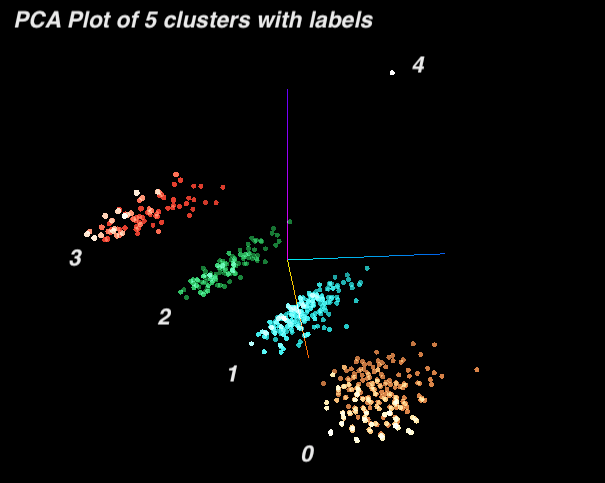

In [54]:
# Use Tensorflow Projector to visualise final clusters using this JSON config

'''

{
  "embeddings": [
    {
      "tensorName": "My tensor",
      "tensorShape": [
        1000,
        50
      ],
      "tensorPath": "https://gist.githubusercontent.com/zain910128/77f64ee0d292fd103d0bddd6fe1264bd/raw/4138eaff06e41b309853d84b0d7c5a48d2ae57b7/ProjectorData",
      "metadataPath": "https://gist.githubusercontent.com/zain910128/77f64ee0d292fd103d0bddd6fe1264bd/raw/f88a27aa5cfa749dc7a108058974e115e5a1a1c7/ProjectorMetadata"
    }
  ]
}

'''

print("Click here to open in Tensorflow Projector: http://projector.tensorflow.org/?config=https://gist.githubusercontent.com/zain910128/77f64ee0d292fd103d0bddd6fe1264bd/raw/27d06406acf28904244f15d16b8488f10a7e4629/projector ")


from IPython.display import Image
Image('https://user-images.githubusercontent.com/31308724/87270453-27cf5f00-c49e-11ea-8964-eab8a40ba346.png')

In [55]:
labels_df = x_enc.copy()
labels_df["hclust_agg"] = y_hc
labels_df["kmode"] = y_km
labels_df["hdbscan"] = y_hdb
labels_df["Games"] = x.k17game

In [56]:
labels_df.to_csv("labels.csv")

In [57]:
labels_km = labels_df[['fighting_1', 'puzzle_1', 'action_1', 'FPS_1', 'strategy_1', 'simulation_1',
       'sports_1',
       'RPG_1', 'adventure_1',
       'racing_1','rhythm_1',
       'survival_1', 'kmode']]

## Step 8 - Analysing the clusters

Let's see what kind of games are played by members of each cluster

#### Cluster 0 
- The teenagers in this cluster play a lot of Fun and Easy games that do not require massive time commitments to master and become expert at.

- These games also seem to be mostly single player

- Common Games:	Sudoku, Solitaire, Dance Dance Revolution, Fifa, Madden, Guitar Hero, Mario

In [58]:
print("Number of teenagers in this cluster:")
(labels_df.kmode==0).sum()

Number of teenagers in this cluster:


372

In [59]:
print ("\n                                           Games played by Cluster 0")
labels_df[labels_df.kmode==0][['Games']].head(25)


                                           Games played by Cluster 0


,Games
0,"MADDEN, NBA LIVE, NASCAR"
1,"THE SIMS 2, CRAZY TAXI 4, SIM PETS"
4,"HALO 3, GUITER HERO, BLOON'S POWER DEFENSE 2"
10,"PACMAN, TETRIS"
12,"DRAGON BALL Z, BUDDHA KAI, TEN KAI EG"
13,"SODUKO, CROSSWORD PUZZLES, WORD SEARCH"
16,"TETRIS, MEDAL OF HONOR, NCAA FOOTBALL 07"
20,"MARIO KART, TETRIS"
25,GUITAR HERO
27,I DON'T KNOW....DON'T PLAY MANY GAMES


#### Cluster 1 
- The teenagers in this cluster play all kinds of games.

- Common Games:	Warcraft, Sims, God of War, NFL, Tetris, Guitar Hero, Need for Speed, Halo

In [60]:
print("Number of teenagers in this cluster:")
(labels_df.kmode==1).sum()

Number of teenagers in this cluster:


388

In [61]:
print ("\n                                           Games played by Cluster 1")
labels_df[labels_df.kmode==1][['Games']].head(25)


                                           Games played by Cluster 1


,Games
3,"HALO 3, GUITAR HERO, MARIO GALAXY"
5,"HALO 3, RAINBOW6, FINAL FANASTY"
6,"GEARS OF WAR, HALO 3, MADDEN 08"
17,"HALO 3, CALL OF DUTY 4, TETRIS"
22,"MEDAL OF HONOR, FRONTLINE, HALO 2"
23,"WORLD OF WARCRAFT, HALO 3, RISE OF THE NINJA"
24,"RAINBOW SIX, MADDEN 08, WORLD OF WARCRAFT"
30,
33,"ROCK BAND, HALO 3, BIOSHOCK"
34,"SOLITAIRE, MARIO KART RACING"


#### Cluster 2
- The teenagers in this cluster play Sports and Action games.

- Common Games:	Call of Duty, Halo, Hitman, Assassin’s Creed, Madden, NFL, NFS, NCAA, Guitar Hero

In [62]:
print("Number of teenagers in this cluster:")
(labels_df.kmode==2).sum()

Number of teenagers in this cluster:


136

In [63]:
print ("\n                                           Games played by Cluster 2")
labels_df[labels_df.kmode==2][['Games']].head(25)


                                           Games played by Cluster 2


,Games
2,"CALL OF DUTY 4, GUITAR HERO 3, ORANGE BOX"
8,"MEDAL OF HONOR, GUITAR HERO, MADDEN 08"
9,HALO 3; GUITAR HERO;|MARIO PARTY
18,"MADDEN, DOUBLE 07"
26,STRATEGIC GAMES
40,"GRAND THEFT AUTO, HALO 2"
47,"NBA 2K8, MADDEN 08, TENNIS"
50,"WORLD OF WARCRAFT, MADDDEN 08, HALO 3"
52,"DANCE DANCE REVOLUTION, GUITAR HERO"
53,"WRESTLING 08, NBA LIVE 08, MADDEN 08"


#### Cluster 3
- The teenagers in this cluster play intellectual games.

- Common Games:	Sims, Sudoku, Solitaire, Tetris, Guitar Hero, Bejeweled, Mario, Wii, Dance Dance Rev

In [64]:
print("Number of teenagers in this cluster:")
(labels_df.kmode==3).sum()

Number of teenagers in this cluster:


168

In [65]:
print ("\n                                           Games played by Cluster 3")
labels_df[labels_df.kmode==3][['Games']].sample(25)


                                           Games played by Cluster 3


,Games
914,"ROLLER COASTER TYCON, SOLITARE, ZOOMBINIS"
150,"ROLLER COASTER TYCON, THRILLVILLE, GUITAR HERO"
178,"GUITAR HERO, DANCE DANCE REVOLUTION, HALO"
577,"SECOND LIFE, WII SPORTS"
895,"TETRIS, SOLITAIRE, DANCE DANCE REVOLUTION"
844,"MARIO, BRAINQUEST"
84,"SOLITAIRE, SODUKU, SCENE IT"
643,"HALF LIFE, THE SIMS, GUITAR HERO"
430,DINER DASH
546,"THE SIMS 2, THE URBZ: SIMS IN THE CITY, KINGDO..."


#### Cluster 4
- The teenagers in this cluster don't play games.


In [66]:
print("Number of teenagers in this cluster:")
(labels_df.kmode==4).sum()

Number of teenagers in this cluster:


38

In [67]:
print ("\n                                           Games played by Cluster 4")
labels_df[labels_df.kmode==4][['Games']].sample(5)


                                           Games played by Cluster 4


,Games
513,
613,
389,
677,
198,


## Step 9 - Identifying Cluster Traits

- We create a Cluster Profile by looking at which genres are favoured the most in a cluster.

- For a given cluster, we assign a score to each genre.

- The score for a genre is calculated by total number of teens who said "Yes" to the genre, divided by the total number of teens in the cluster.

- Thus, for each cluster we will have Genre preferences.

In [68]:
labels_km0 = labels_km[labels_km.kmode==0]
labels_km1 = labels_km[labels_km.kmode==1]
labels_km2 = labels_km[labels_km.kmode==2]
labels_km3 = labels_km[labels_km.kmode==3]
labels_km4 = labels_km[labels_km.kmode==4]

In [69]:
cluster_profiles = [labels_km0.iloc[:,:-1].mean(),
                    labels_km1.iloc[:,:-1].mean(),
                    labels_km2.iloc[:,:-1].mean(),
                    labels_km3.iloc[:,:-1].mean(),
                    labels_km4.iloc[:,:-1].mean()]


In [70]:
cluster_profiles[0]
# labels_km[labels_km.kmode==3]

fighting_1      0.228495
puzzle_1        0.854839
action_1        0.623656
FPS_1           0.142473
strategy_1      0.715054
simulation_1    0.424731
sports_1        0.693548
RPG_1           0.209677
adventure_1     0.723118
racing_1        0.817204
rhythm_1        0.728495
survival_1      0.077957
dtype: float64

In [71]:
# Write loop to plot all Radar Charts at once

import plotly.graph_objects as go

cn=0
cd = ['Passtimer','Gamer','Thriller','Puzzler','Naysayer']
for c in cluster_profiles:
  fig = go.Figure(data=go.Scatterpolar(
    r = c,
    theta = ['Fighting', 'Puzzle', 'Action', 'FPS', 'Strategy', 'Simulation',
        'Sports', 'RPG', 'Adventure', 'Racing','Rhythm', 'Survival', 'kmode'],
    fill = 'toself'
  ))

  fig.update_layout(
    title={
        'text': "Cluster %d - %s" %(cn , cd[cn]),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    polar=dict(
      radialaxis=dict(
        visible=True
      ),
    ),
    showlegend=False
  )
  cn+=1
  fig.show()

The 5 radar plots above show the Gaming Preference Profile of each Cluster.